# Image Filtering

## OpenCV
(pytorch)$ conda install -c conda-forge py-opencv

In [2]:
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

import numpy.testing as npt
import os

# %matplotlib qt
# %matplotlib inline

In [3]:
img = cv.imread('building.jpg')

### Sharpening filter

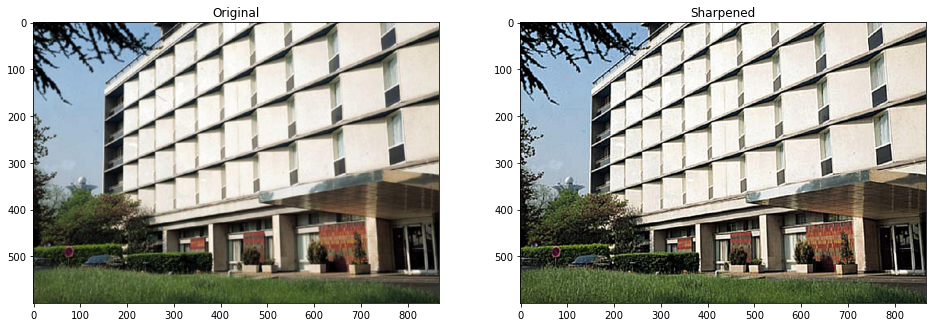

0.0


In [5]:
# Quiz: sharpening 구현
N = 7  # 박스 필터의 크기는 7으로 할 것
kernel = - np.ones((N,N), np.float32) / (N*N)
kernel[(N//2), (N//2)] += 2

sharpned = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(sharpned, cv.COLOR_BGR2RGB)),plt.title('Sharpened')
plt.show()

# Test case
ref = cv.imread("sharpned7.png")
mse = np.mean((ref - sharpned)**2)
print(mse)
assert mse < 1

### Gaussian filter

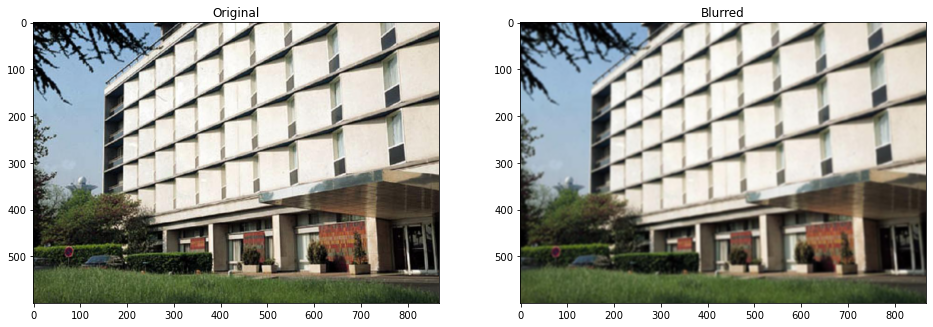

3.840245775729647e-06


In [6]:

# Quiz: gaussian filter를 구현, cv.GaussianBlur 를 사용하지마세요.
sigma = 2.0 # sigma는 2.0로 할것
N = 7 # 필터 크기를 7로 할것
# 커널의 합(np.sum(kernel))이 1이 되야 함 
kernel = np.zeros((N,N), np.float32)
for row in range(N):
    for column in range(N):
        i = row - N // 2
        j = column - N // 2
        gaus = (1 / (2 * np.pi * sigma**2) * np.exp(- (i**2 + j**2) / (2 * sigma**2)))
        kernel[row,column] = gaus
                
total = np.sum(kernel)
kernel /= total
# ----------------------------------------------------------------------------

blurred = cv.filter2D(img,-1,kernel)

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB)),plt.title('Blurred')
plt.show()


# Test case
ref = cv.imread("gaussian.png")
mse = np.mean((ref - blurred)**2)
print(mse)
assert mse < 1
